In [32]:
import json
import matplotlib.pyplot as plt
import seaborn
from collections import Counter
import collections
%matplotlib inline

In [26]:
annotations = []
majority_matrix = {'0.6666666666':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3333333333':[0,0,0,0]}

with open("annotations.jsonl", "r") as inf:
    annotations = [json.loads(x) for x in inf.readlines()]

for a in annotations:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])][(most_common[0][1])-2] += 1
    else:
        majority_matrix[str(most_common[1][0])][(most_common[1][1])-2] += 1

print("     |   2\t  3\t  4\t  5")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3333333333'][0]) + "\t" + str(majority_matrix['0.3333333333'][1])+ "\t" + str(majority_matrix['0.3333333333'][2])+ "\t" + str(majority_matrix['0.3333333333'][3]))
print("0.6  | " + str(majority_matrix['0.6666666666'][0]) + "\t" + str(majority_matrix['0.6666666666'][1])+ "\t" + str(majority_matrix['0.6666666666'][2])+ "\t" + str(majority_matrix['0.6666666666'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5
--------------------------------------------
0.0  | 1196	1438	679	306
0.3  | 2838	2882	800	119
0.6  | 3029	3055	1044	146
1.0  | 1247	977	204	20


'\n    2 3 4 5 \n0.0\n0.3\n0.6\n1.0\n'

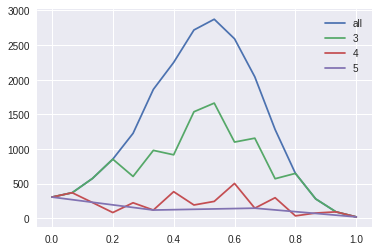

In [57]:
# plot mean
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations:
    mean = str(round(a['truthMean'], 5))[:6]
    most_common = Counter(a['truthJudgments']).most_common(1)
    try:
        y_major_all[mean] += 1
    except:
        y_major_all[mean] = 1
    if most_common[0][1] > 2:
        try:
            y_major_3[mean] += 1
        except:
            y_major_3[mean] = 1
    if most_common[0][1] > 3:
        try:
            y_major_4[mean] += 1
        except:
            y_major_4[mean] = 1
    if most_common[0][1] > 4:
        try:
            y_major_5[mean] += 1
        except:
            y_major_5[mean] = 1

ordered_all = collections.OrderedDict(sorted(y_major_all.items()))
plt.plot(list(ordered_all.keys()), list(ordered_all.values()), label="all")

ordered_3 = collections.OrderedDict(sorted(y_major_3.items()))
plt.plot(list(ordered_3.keys()), list(ordered_3.values()), label="3+")

ordered_4 = collections.OrderedDict(sorted(y_major_4.items()))
plt.plot(list(ordered_4.keys()), list(ordered_4.values()), label="4+")

ordered_5 = collections.OrderedDict(sorted(y_major_5.items()))
plt.plot(list(ordered_5.keys()), list(ordered_5.values()), label="5+")

plt.legend()